## Image Deconvolution

### Mark Newman - Computational Physics

When a photo is blurred each point on the photo gets smeared out according to some "smearing distribution", which is technically called a *point spread function*. We can represent this smearing mathematically as follows. For simplicity we will assume we're working with a black and white photograph, so that the picture can be represented by a single function $a(x,y)$ which tells you the brightness at each point $(x,y)$. And let us denote the point spread unction by $f(x,y)$. This means that a single bright dot at the origin ends up appearing as $f(x,y)$ instead. If $f(x,y)$ is a broad function then the picture is badly blurred. If it is a narrow peak then the picture is relatively sharp.

In general the brightness $b(x,y)$ of the blurred photo at point $(x,y)$ is given by:

$$b(x,y) = \int_0^K \int_0^L a(x',y')f(x-x', y-y')dx'dy'$$


where $K\times L$ is the dimension of the picture. This equation is called the *convolution* of the picture with the point spread function.


As an example, let's explore the hypothetical 1D case -

$$b(x) = \int_0^L a(x')f(x-x')dx'$$

The function $b(x)$ can be represented by a Fourier Series - 

$$b(x) = \sum_{k=-\infty}^{\infty} \bar{b}_k e^{-i\frac{2\pi k x}{L}}dx$$

where

$$\bar{b}_k = \frac{1}{L}\int_0^L b(x) e^{-i\frac{2 \pi kx}{L}}dx$$

are the Fourier coefficients. Substituting $b(x)$ into this equation gives

$$\begin{align}
\bar{b}_k &= \frac{1}{L}\int_0^L \int_0^L a(x')f(x-x')e^{-i\frac{2 \pi kx}{L}}dx'dx
\\
&= \frac{1}{L}\int_0^L \int_0^L a(x')f(x-x')e^{-i\frac{2 \pi k(x-x')}{L}}e^{-i\frac{2 \pi kx'}{L}}dx'dx

\end{align}$$

Changing variables to $R=x-x'$ we get

$$\bar{b}_k = \frac{1}{L}\int_0^L a(x')e^{-i\frac{2 \pi kx'}{L}} \int_{-x}^{L-x'}f(R)e^{-i\frac{2 \pi k R}{L}}dRdx'$$


If we make $f(x)$ a periodic function in the standard fashion by repeating it infinitely many times to the left and right of the interval from 0 to $L$, then the integral above can be written as

$$\int_{-x'}^{L-x'}f(R)e^{-i\frac{2 \pi kR}{L}}dR = $$

The Fourier transform of the blurred photo is the product of the Fourier transforms of the unblurred photo and the point spread function:

$$\bar{b}_k = \int_0^La(x')e^{-i\frac{2\pi k x'}{L}}\bar{f}_kdx' = L \bar{a}_k\bar{f}_k$$

Then it is clear that to unblur our picture, we take the blurred photo and Fourier Transform it to get $\bar{b}_k = L \bar{a}_k\bar{f}_k$. We also take the point spread function and Fourier Transform it ot get \bar{f}_k. Then we divide one by the other:

$$\frac{\bar{b}_k}{L\bar{f}_k}=\bar{a}_k$$


Then, finally we perform an inverse Fourier Transform on $\bar{a}_k$ to get back to the unblurred picture. This process of recovering the unblurred picture from the blurred one, of reversing the convolution process, is called deconvolution.


Real pictures are two-dimensional, but the mathematics follows through exactly the same. For a picture of dimensions $KxL$ we find that the two-dimensional Fourier Transforms are related by:

$$\bar{b}_{kl} = KL\bar{a}_{kl}\bar{f}_{kl}$$

and again we just divide the blurred Fourier Transform by the Fourier Transform of the point spread function to get the Fourier Transform of the unblurred picture.

The main complication with deblurring in practice is that we don't usually know the point spread function. Typically we have to experiment with different ones until we find somehting that works. For many cameras it's a reasonable approximation to assume the point spread function is Gaussian:

$$f(x,y) = e^{-\frac{x^2+y^2}{2\sigma^2}}$$

where $\sigma$ is the width of the Gaussian. Even with this assumption, however, we still don't know the value of $\sigma$ and we may experiemnt to find a value that works well. In

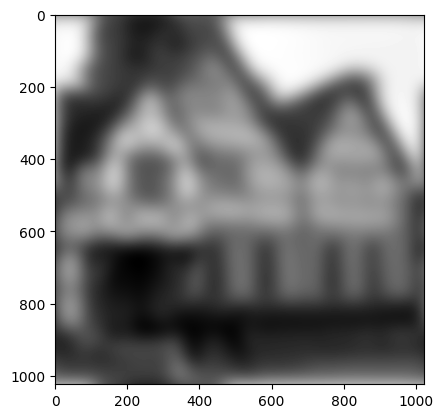

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load image into numpy array

N = 1024
blurry_img = np.zeros((N, N))
with open("blur.txt") as blur:
    for line_num, line in enumerate(blur):
        blurry_img[line_num] = np.array(line.split(" "))

plt.imshow(blurry_img, cmap='gray')
plt.show()

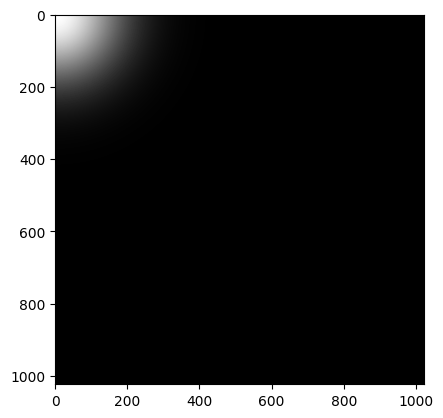

In [19]:
import math

# Gaussian Function
def gaussian(x, y):
    sigma = 125
    return math.e**(-(x**2 + y**2) / (2*sigma**2))

point_spread = np.zeros((N, N))
origin_shift = N/2


for x in range(len(point_spread)):
    for y in range(len(point_spread[0])):
        point_spread[x, y] = gaussian(x, y)

plt.imshow(point_spread, cmap = 'gray')
plt.show()

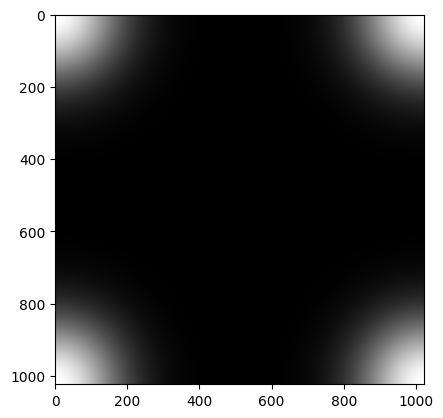

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming N is the size of the array
N = 1024
sigma = 125

# Gaussian Function
def gaussian(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2*sigma**2))

# Create an empty array for the point spread function
point_spread = np.zeros((N, N))

# Populate the point spread array with the Gaussian function
for x in range(N):
    for y in range(N):
        # Induce periodicity by repeating function values at the midpoint
        # of each axis
        if x > N // 2:
            x -= N
        if y > N // 2:
            y -= N
        # Assign the Gaussian value to the point spread array
        point_spread[x, y] = gaussian(x, y, sigma)

# Display the point spread function
plt.imshow(point_spread, cmap='gray')
plt.show()


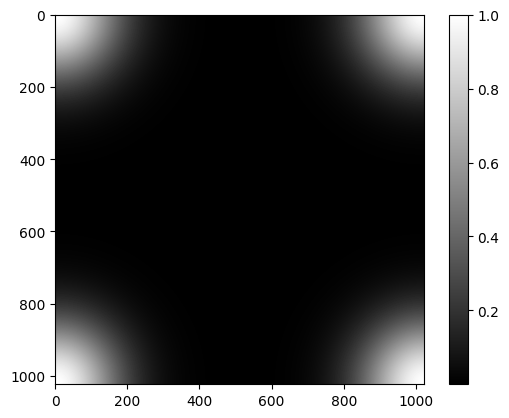

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming N is the size of the array
N = 1024
sigma = 125

# Gaussian Function
def gaussian(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2*sigma**2))

# Create an empty array for the point spread function
point_spread = np.zeros((N, N))

# Populate the point spread array with the Gaussian function
for x in range(N):
    for y in range(N):
        # Use temporary variables for calculating the Gaussian value
        x_temp = x
        y_temp = y

        # Induce periodicity by wrapping around the midpoint of the array
        if x_temp > N // 2:
            x_temp -= N
        if y_temp > N // 2:
            y_temp -= N

        # Assign the Gaussian value to the point spread array
        point_spread[x, y] = gaussian(x_temp, y_temp, sigma)

# Display the point spread function
plt.imshow(point_spread, cmap='gray')
plt.colorbar()  
plt.show()


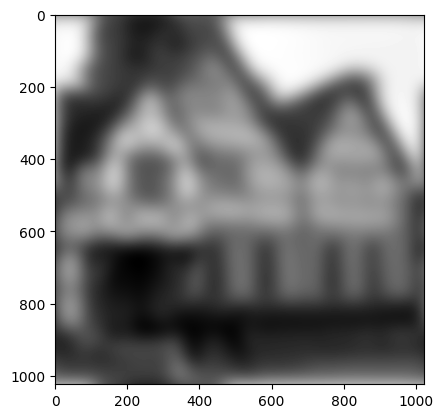

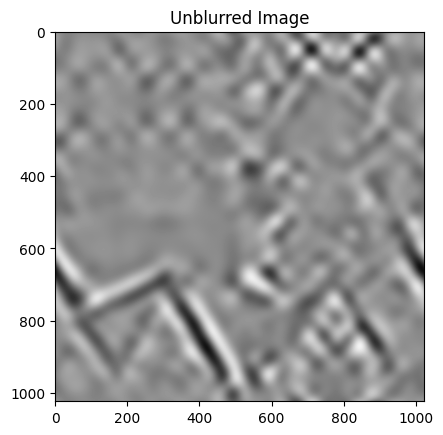

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft2, irfft2

#-----------------------------------------------------------#

# Function definitions (gaussian and any other necessary functions)
N = 1024
sigma = 2500

# Gaussian Function
def gaussian(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2*sigma**2))

#-----------------------------------------------------------#

# Step 1: Read in the blurred photo

blurry_img = np.zeros((N, N))
with open("blur.txt") as blur:
    for line_num, line in enumerate(blur):
        blurry_img[line_num] = np.array(line.split(" "))

plt.imshow(blurry_img, cmap='gray')
plt.show()


#-----------------------------------------------------------#

# Step 2: Calculate the point spread function

# Create an empty array for the point spread function
point_spread = np.zeros((N, N))

# Populate the point spread array with the Gaussian function
for x in range(N):
    for y in range(N):
        # Use temporary variables for calculating the Gaussian value
        x_temp = x
        y_temp = y

        # Induce periodicity by wrapping around the midpoint of the array
        if x_temp > N // 2:
            x_temp -= N
        if y_temp > N // 2:
            y_temp -= N

        # Assign the Gaussian value to the point spread array
        point_spread[x, y] = gaussian(x_temp, y_temp, sigma)


# Step 3: Fourier transforms both
fft_blurred = rfft2(blurry_img)
fft_point_spread = rfft2(point_spread)

# Step 4: Divide one by the other
# Add a small constant to the denominator to avoid division by zero
fft_unblurred = fft_blurred / (fft_point_spread + 1e-10)

# Step 5: Perform an inverse transform to get the unblurred photo
unblurred_img = irfft2(fft_unblurred)

# Step 6: Display the unblurred photo on the screen
plt.imshow(unblurred_img, cmap='gray')
plt.title("Unblurred Image")
plt.show()
